In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


# Read the train dataset

In [2]:
df = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv')
df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [3]:
df.shape

(375734, 246)

In [4]:
df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,359800.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.339626,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.640000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,9.490000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,18.740000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


# Data Assessing and Cleaning

In [5]:
dtype = df.dtypes.to_list()
column_names = df.columns.to_list()
for i in range(len(dtype)):
    print(f'{column_names[i]}: {dtype[i]}')

index: int64
lat: float64
lon: float64
startdate: object
contest-pevpr-sfc-gauss-14d__pevpr: float64
nmme0-tmp2m-34w__cancm30: float64
nmme0-tmp2m-34w__cancm40: float64
nmme0-tmp2m-34w__ccsm30: float64
nmme0-tmp2m-34w__ccsm40: float64
nmme0-tmp2m-34w__cfsv20: float64
nmme0-tmp2m-34w__gfdlflora0: float64
nmme0-tmp2m-34w__gfdlflorb0: float64
nmme0-tmp2m-34w__gfdl0: float64
nmme0-tmp2m-34w__nasa0: float64
nmme0-tmp2m-34w__nmme0mean: float64
contest-wind-h10-14d__wind-hgt-10: float64
nmme-tmp2m-56w__cancm3: float64
nmme-tmp2m-56w__cancm4: float64
nmme-tmp2m-56w__ccsm3: float64
nmme-tmp2m-56w__ccsm4: float64
nmme-tmp2m-56w__cfsv2: float64
nmme-tmp2m-56w__gfdl: float64
nmme-tmp2m-56w__gfdlflora: float64
nmme-tmp2m-56w__gfdlflorb: float64
nmme-tmp2m-56w__nasa: float64
nmme-tmp2m-56w__nmmemean: float64
contest-rhum-sig995-14d__rhum: float64
nmme-prate-34w__cancm3: float64
nmme-prate-34w__cancm4: float64
nmme-prate-34w__ccsm3: float64
nmme-prate-34w__ccsm4: float64
nmme-prate-34w__cfsv2: float6

In [6]:
# Get a boolean series indicating which columns are of type object
object_columns = df.dtypes == object

# Select the column names that are of type object
object_column_names = df.columns[object_columns]

# Print the column names
print(object_column_names)

Index(['startdate', 'climateregions__climateregion'], dtype='object')


In [7]:
df.isnull().values.any()

True

In [8]:
# Get a boolean series indicating which columns have null values
null_columns = df.isnull().any()

# Select the column names that have null values
null_column_names = df.columns[null_columns]

# Get the total number of rows in the data frame
total_rows = df.shape[0]

# Iterate over the null columns
for column in null_column_names:
    # Get the count of null values for the column
    null_count = df[column].isnull().sum()
    # Calculate the percentage of missing values as a proportion of the total number of rows
    percentage_missing = null_count / total_rows * 100
    # Print the column name, count of missing values, and percentage of missing values
    print(f"Column '{column}' has {null_count} null values ({percentage_missing:.2f}%)")

Column 'nmme0-tmp2m-34w__ccsm30' has 15934 null values (4.24%)
Column 'nmme-tmp2m-56w__ccsm3' has 10280 null values (2.74%)
Column 'nmme-prate-34w__ccsm3' has 8738 null values (2.33%)
Column 'nmme0-prate-56w__ccsm30' has 15934 null values (4.24%)
Column 'nmme0-prate-34w__ccsm30' has 15934 null values (4.24%)
Column 'nmme-prate-56w__ccsm3' has 10280 null values (2.74%)
Column 'nmme-tmp2m-34w__ccsm3' has 8738 null values (2.33%)
Column 'ccsm30' has 15934 null values (4.24%)


In [9]:
df[null_column_names].skew()

nmme0-tmp2m-34w__ccsm30    0.090183
nmme-tmp2m-56w__ccsm3      0.064883
nmme-prate-34w__ccsm3      0.891992
nmme0-prate-56w__ccsm30    1.336665
nmme0-prate-34w__ccsm30    1.334539
nmme-prate-56w__ccsm3      0.811159
nmme-tmp2m-34w__ccsm3      0.089453
ccsm30                     0.090576
dtype: float64

In [10]:
df.duplicated().any()

False

In [11]:
# fill columns with missing values with median because of the skewness
for column in null_column_names:
    df[column] = df[column].fillna(df[column].median())

In [12]:
# test
df.isnull().values.any()

False

# EDA


`Feature extraction to aid EDA`

In [13]:
# Convert startdate column to datetime
df['startdate'] = pd.to_datetime(df['startdate'], format='%m/%d/%y')

#test
df['startdate'].dtype

dtype('<M8[ns]')

In [14]:
# Extract Year, Month, Day, Hour, Minutes and Day of the Week from Formatted Date Column
df['startyear'] = pd.to_datetime(df['startdate']).dt.year
df['startmonth'] = pd.to_datetime(df['startdate']).dt.month
df['start_day'] = pd.to_datetime(df['startdate']).dt.strftime("%A")

#test
for column in ['startyear', 'startmonth', 'start_day']:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in startyear: [2014 2015 2016]
Unique values in startmonth: [ 9 10 11 12  1  2  3  4  5  6  7  8]
Unique values in start_day: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


In [15]:
# Extract Season of the year from the Month Column

def season_of_year(season):
    if season in [12, 1, 2, 3]:
        season = 'Winter'
    elif season in [6, 7, 8]:
        season = 'Summer'
    elif season in [4, 5]:
        season = 'Spring '
    elif season in [9, 10, 11]:
        season = 'Autumn'
    return season


df['season'] = df['startmonth'].apply(season_of_year)

# test
df['season'].unique()

array(['Autumn', 'Winter', 'Spring ', 'Summer'], dtype=object)

` Actual EDA`

Text(0.5, 0.98, 'Weather Features by season')

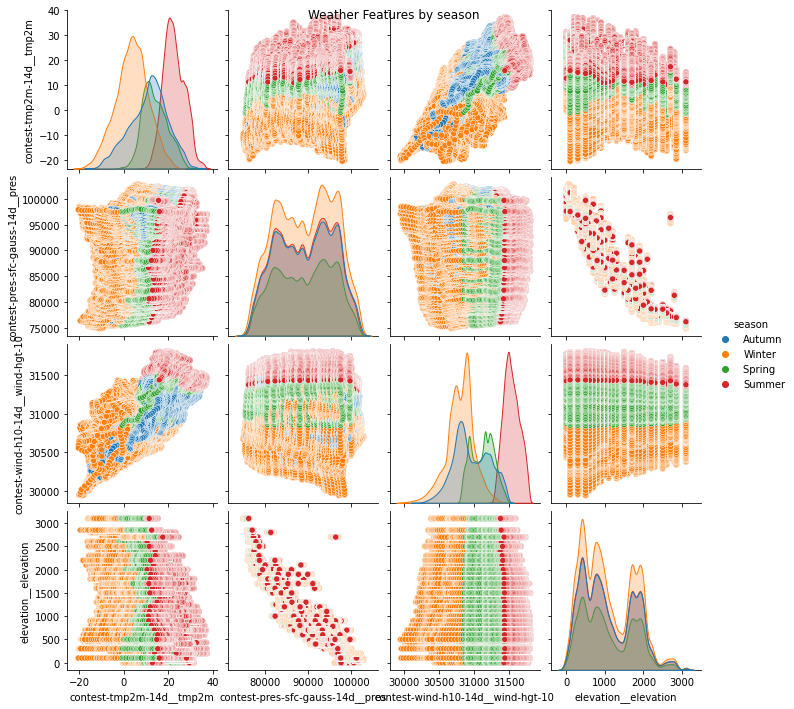

In [16]:
plot = sns.pairplot(df, vars = ['contest-tmp2m-14d__tmp2m', 
                                'contest-pres-sfc-gauss-14d__pres', 
                                'contest-wind-h10-14d__wind-hgt-10',
                                'elevation__elevation'], 
                                hue = 'season')
plot.fig.suptitle('Weather Features by season')

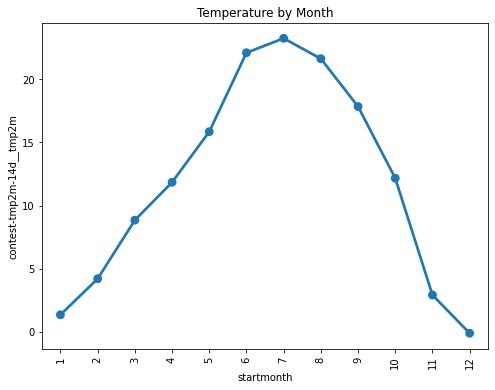

In [17]:
plt.figure(figsize = (8,6))
sns.pointplot(x = 'startmonth', y = 'contest-tmp2m-14d__tmp2m', data = df)
plt.title('Temperature by Month')
plt.xticks(rotation = 90)
plt.show()

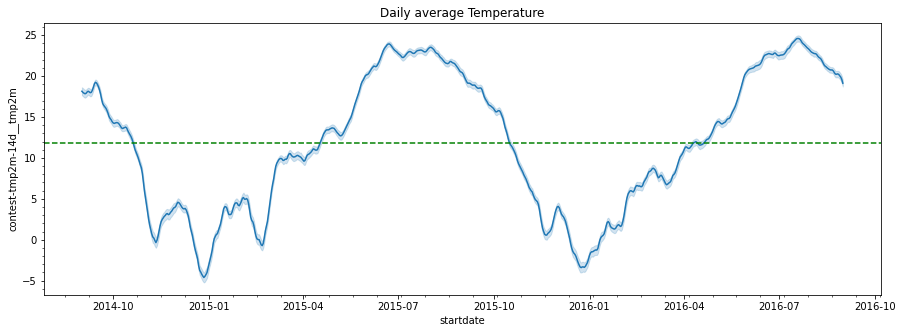

In [18]:
f, ax = plt.subplots(figsize = (15, 5))
sns.lineplot(data = df, x = "startdate", y = "contest-tmp2m-14d__tmp2m")

rad_avg= df['contest-tmp2m-14d__tmp2m'].mean()
ax.axhline(rad_avg, color = 'green', linestyle='--', label = f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which = 'major', linestyle = '-', linewidth = 0.5, color = 'white',)
ax.grid(which = 'minor', linestyle = ':', linewidth = 0.5, color = 'white', alpha = 0.7)

plt.title('Daily average Temperature')
plt.show()
ax.legend()

Text(0.5, 1.0, 'Average Temperature by Season')

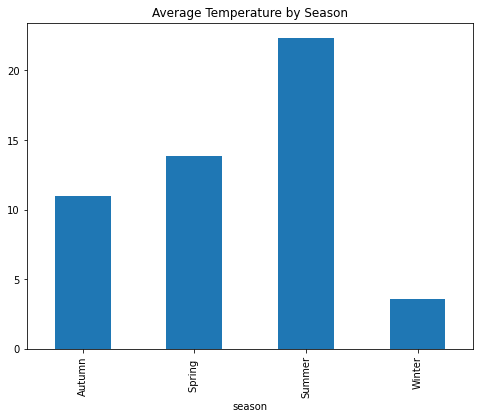

In [19]:
# plot mean Temperature by Season
plt.figure(figsize = (8,6))
df.groupby('season')['contest-tmp2m-14d__tmp2m'].mean().plot.bar()
plt.title('Average Temperature by Season')

Text(0.5, 1.0, 'Average Temperature by Day')

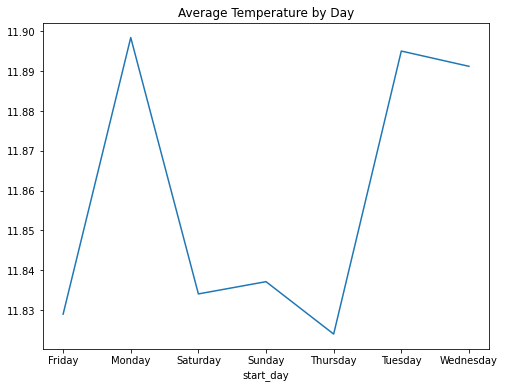

In [20]:
# plot mean Temperature by hour
plt.figure(figsize = (8,6))
df.groupby('start_day')['contest-tmp2m-14d__tmp2m'].mean().plot()
plt.title('Average Temperature by Day')

# Preprocessing

In [21]:
## select columns to drop with correlation over 95
def select_correlated_columns(df, target_col):
    # Get the correlation matrix for the dataframe
    cor_matrix = df.corr().abs()
    
    # Exclude the target column from the correlation matrix
    cor_matrix = cor_matrix.drop(target_col, axis=0).drop(target_col, axis=1)
    
    # Get the upper triangle of the correlation matrix
    upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
    
    # Select columns with correlation above 95%
    col_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
    return col_to_drop

In [22]:
to_drop = select_correlated_columns(df, 'contest-tmp2m-14d__tmp2m')
to_drop

['lat',
 'nmme0-tmp2m-34w__cancm40',
 'nmme0-tmp2m-34w__ccsm40',
 'nmme0-tmp2m-34w__cfsv20',
 'nmme0-tmp2m-34w__gfdlflora0',
 'nmme0-tmp2m-34w__gfdlflorb0',
 'nmme0-tmp2m-34w__gfdl0',
 'nmme0-tmp2m-34w__nasa0',
 'nmme0-tmp2m-34w__nmme0mean',
 'nmme-tmp2m-56w__cancm4',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-tmp2m-56w__ccsm4',
 'nmme-tmp2m-56w__cfsv2',
 'nmme-tmp2m-56w__gfdl',
 'nmme-tmp2m-56w__gfdlflora',
 'nmme-tmp2m-56w__gfdlflorb',
 'nmme-tmp2m-56w__nasa',
 'nmme-tmp2m-56w__nmmemean',
 'nmme0-prate-56w__gfdlflorb0',
 'nmme0-prate-34w__gfdlflorb0',
 'nmme-prate-56w__cancm3',
 'nmme-prate-56w__cancm4',
 'nmme-prate-56w__ccsm4',
 'nmme-prate-56w__cfsv2',
 'nmme-prate-56w__gfdl',
 'nmme-prate-56w__gfdlflora',
 'nmme-prate-56w__gfdlflorb',
 'nmme-prate-56w__nasa',
 'nmme-prate-56w__nmmemean',
 'nmme-tmp2m-34w__cancm3',
 'nmme-tmp2m-34w__cancm4',
 'nmme-tmp2m-34w__ccsm3',
 'nmme-tmp2m-34w__ccsm4',
 'nmme-tmp2m-34w__cfsv2',
 'nmme-tmp2m-34w__gfdl',
 'nmme-tmp2m-34w__gfdlflora',
 'nmme-tmp2m-34w__

In [23]:
train_df = df
train_df = train_df.drop(to_drop, axis=1)

In [24]:
train_df.shape

(375734, 197)

## Encode

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ['season', 'start_day']

train_df[cols] = train_df[cols].apply(le.fit_transform)

In [26]:
# One-hot encode the 'climateregions__climateregion' column
df_onehot = pd.get_dummies(train_df['climateregions__climateregion'])

# Join the one-hot encoded dataframe with the original dataframe
train_df = train_df.join(df_onehot)

# Drop the 'climateregions__climateregion' column from the original dataframe
train_df = train_df.drop(columns=['climateregions__climateregion'])

## Feature selection

In [27]:
X = train_df.drop(['contest-tmp2m-14d__tmp2m', 'startdate', 'index'], axis =1)

y = train_df['contest-tmp2m-14d__tmp2m']

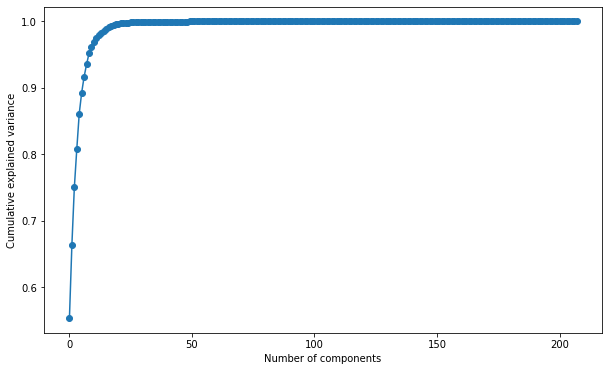

In [28]:
pca = PCA().fit(X)
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [29]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# How much variance we'd capture 
cumulative_explained_variance[10]

0.9691638447380354

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=10)
X = pca.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, y_train.shape

((300587, 10), (300587,))

# Model dev

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lgb = LGBMRegressor()


In [33]:
# fit models on training set
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lgb.fit(X_train, y_train)

# Make predictions on the test set
preds_knn = knn.predict(X_test)
preds_dt = dt.predict(X_test)
preds_rf = rf.predict(X_test)
preds_lgb = lgb.predict(X_test)

In [34]:
# Calculate RMSE for each model
rmse_knn = np.sqrt(mean_squared_error(y_test, preds_knn))
rmse_dt = np.sqrt(mean_squared_error(y_test, preds_dt))
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
rmse_lgb = np.sqrt(mean_squared_error(y_test, preds_lgb))

# Print the scores
print(f'KNN RMSE: {rmse_knn:.3f}')
print(f'Decision tree RMSE: {rmse_dt:.3f}')
print(f'Random forest RMSE: {rmse_rf:.3f}')
print(f'LightGBM RMSE: {rmse_lgb:.3f}')

KNN RMSE: 1.826
Decision tree RMSE: 2.247
Random forest RMSE: 1.538
LightGBM RMSE: 2.645


# Preprocess test data

In [35]:
test_data = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv')
test_data.shape

(31354, 245)

In [36]:
# Convert startdate column to datetime
test_data['startdate'] = pd.to_datetime(test_data['startdate'], format='%m/%d/%y')

# Extract Year, Month, Day, Hour, Minutes and Day of the Week from Formatted Date Column
test_data['startyear'] = pd.to_datetime(test_data['startdate']).dt.year
test_data['startmonth'] = pd.to_datetime(test_data['startdate']).dt.month
test_data['start_day'] = pd.to_datetime(test_data['startdate']).dt.strftime("%A")

# Extract Season of the year from the Month Column

def season_of_year(season):
    if season in [12, 1, 2, 3]:
        season = 'Winter'
    elif season in [6, 7, 8]:
        season = 'Summer'
    elif season in [4, 5]:
        season = 'Spring '
    elif season in [9, 10, 11]:
        season = 'Autumn'
    return season


test_data['season'] = test_data['startmonth'].apply(season_of_year)

In [37]:
test_data = test_data.drop(to_drop, axis=1)

In [38]:
# encode
test_data[cols] = test_data[cols].apply(le.fit_transform)

df_onehoten = pd.get_dummies(test_data['climateregions__climateregion'])

# Join the one-hot encoded dataframe with the original dataframe
test_data = test_data.join(df_onehoten)

# Drop the 'climateregions__climateregion' column from the original dataframe
test_data = test_data.drop(columns=['climateregions__climateregion', 'startdate', 'index'])

### Make prediction

In [39]:
new_data = scaler.transform(test_data)
new_data = pca.transform(new_data)

In [40]:
preds_knn = knn.predict(new_data)
preds_dt = dt.predict(new_data)
preds_rf = rf.predict(new_data)
preds_lgb = lgb.predict(new_data)

### Make submissions

In [41]:
sub = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv')

In [42]:
# Save the files
for model, preds in zip(['knn', 'dt', 'rf','lgb'], [preds_knn, preds_dt, preds_rf, preds_lgb]):
    submission_df = pd.DataFrame({'contest-tmp2m-14d__tmp2m': preds, 'index': sub['index']})
    file_name = f'submission_{model}_4.csv'  # Add suffix to file name
    submission_df.to_csv(file_name, index=False)
